In [0]:
from keras.datasets import mnist

(train_data,_),(test_data,_)=mnist.load_data()

train_data=train_data/255.0

test_data=test_data/255.0

In [0]:
import numpy as np

train_data_noisy=train_data+0.5*np.random.normal(loc=0,scale=1,size=train_data.shape)
test_data_noisy=test_data+0.5*np.random.normal(loc=0,scale=1,size=test_data.shape)
#adding random noise to the digits from gaussian distribution

train_data_noisy=np.clip(train_data_noisy,0,1)
test_data_noisy=np.clip(test_data_noisy,0,1)

#clipping the pixels values greater than 1 and less than 0

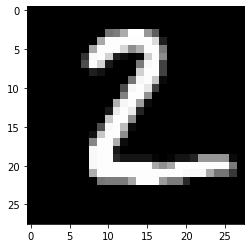

In [3]:
from matplotlib import pyplot as plt 

plt.imshow(test_data[1],cmap='gray')

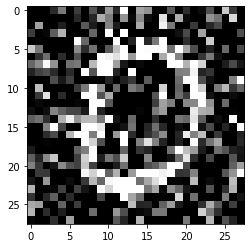

In [20]:
plt.imshow(test_data_noisy[10],cmap='gray')

In [0]:
train_data=train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
test_data=test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

train_data_noisy=train_data_noisy.reshape(train_data_noisy.shape[0],train_data_noisy.shape[1],train_data_noisy.shape[2],1)
test_data_noisy=test_data_noisy.reshape(test_data_noisy.shape[0],test_data_noisy.shape[1],test_data_noisy.shape[2],1)

In [0]:
from keras.layers import Input,Dense,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model

input_layer=Input(shape=train_data.shape[1:])  #layer 1
#train_data (60000,28,28,1)

model=Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
model=MaxPool2D((2,2),padding='same')(model)
model=Conv2D(32,(3,3),activation='relu',padding='same')(model)
encoder=MaxPool2D((2,2),padding='same')(model) #output=(7,7) x32 bottle neck

model=Conv2D(32,(3,3),activation='relu',padding='same')(encoder)
model=UpSampling2D((2,2))(model) #inverse of pooling
model=Conv2D(32,(3,3),activation='relu',padding='same')(model)
model=UpSampling2D((2,2))(model) #output=(28,28) x32

decoder=Conv2D(1,(3,3),activation='relu',padding='same')(model) #output=(28,28) x1

autoencoder=Model(input_layer,decoder)

autoencoder.compile(optimizer='adam',loss='mse')

In [7]:
history=autoencoder.fit(train_data_noisy,train_data,epochs=100,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 13s 239us/step - loss: 0.0176 - val_loss: 0.0138
Epoch 2/100
54000/54000 [==============================] - 7s 124us/step - loss: 0.0129 - val_loss: 0.0124
Epoch 3/100
54000/54000 [==============================] - 7s 124us/step - loss: 0.0121 - val_loss: 0.0119
Epoch 4/100
54000/54000 [==============================] - 7s 125us/step - loss: 0.0117 - val_loss: 0.0118
Epoch 5/100
54000/54000 [==============================] - 7s 124us/step - loss: 0.0114 - val_loss: 0.0114
Epoch 6/100
54000/54000 [==============================] - 7s 125us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 7/100
54000/54000 [==============================] - 7s 126us/step - loss: 0.0111 - val_loss: 0.0112
Epoch 8/100
54000/54000 [==============================] - 7s 124us/step - loss: 0.0110 - val_loss: 0.0112
Epoch 9/100
54000/54000 [==============================] - 7s 124us/step - loss: 0.0109 - val_

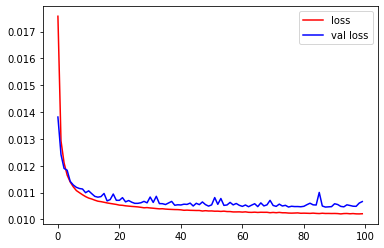

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],'b',label='val loss')
plt.legend()
plt.show()

In [0]:
autoencoder.save_weights('autoencorder_MNIST.h5')

In [0]:
result=autoencoder.predict(test_data_noisy)

for i,img in enumerate(result):

  plt.imshow(img.reshape(28,28),cmap='gray')
  plt.savefig('results1/'+str(i)+'-output.png')
  plt.close()

  plt.imshow(test_data_noisy[i].reshape(28,28),cmap='gray')
  plt.savefig('results1/'+str(i)+'-input.png')
  plt.close()